## Table of Contents
* [1.INTRODUCTION](#1.INTRODUCTION)
* [2.Import_Libraries](#2.Import_Libraries)
* [3.Data_preprocessing_and_cleaning](#3.Data_preprocessing_and_cleaning)
* [4.Exploratory_data_visualization](#4.Exploratory_data_visualization)
* [5.Machine_Learning_Model](#5.Machine_Learning_Model)
* [6.HYPEPARAMETER_TUNNING](#3.HYPEPARAMETER_TUNNING)
* [7.Investigating_Bias_on_the_Gender_Group](#4.Investigating_Bias_on_the_Gender_Group)
* [8.Transparency_Explainable_AI](#5.Transparency_Explainable_AI)

  ## 1. INTRODUCTION
   
   Cardiovascular diseases (CVDs) are the leading cause of death worldwide, accounting for 31% of all deaths with an estimated        17.9 million deaths annually.
   A machine learning model can be very helpful in the early detection and management of cardiovascular disease and high              cardiovascular risk individuals (due to the existence of one or more risk factors, such as hypertension, diabetes, hyperlipidemia, or      already established disease).

# 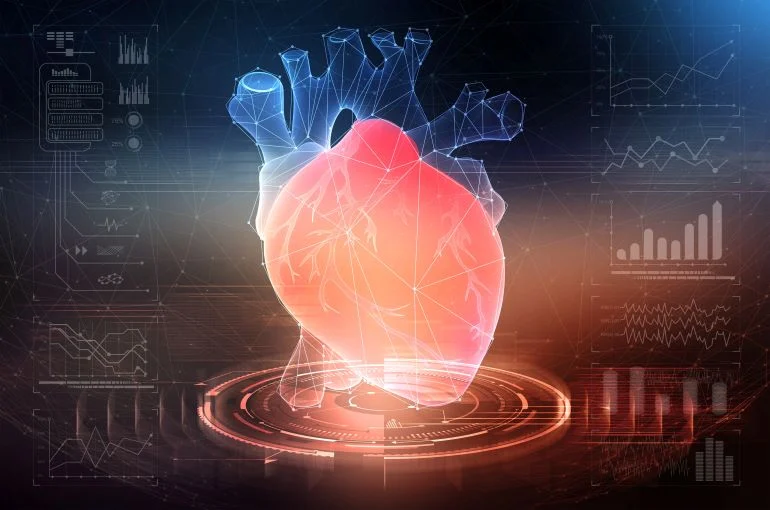

#### Dataset URL:
My dataset was gotten from kaggle https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data


#### Description of the dataset: 
The dataset 918  rows and 12 colums, below are the columns

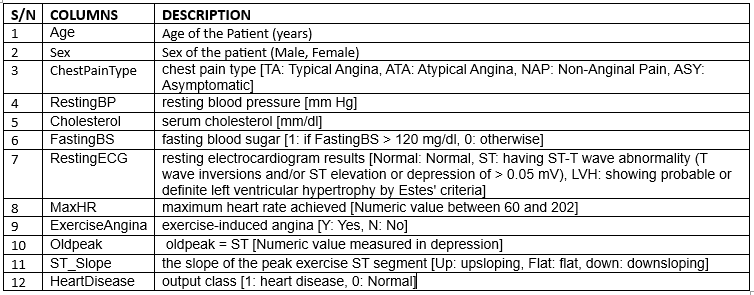

   ## 2. Import_Libraries

In [1]:
# Ignore the warnings

import warnings
warnings.filterwarnings('ignore')

# Data visualization, manipulations and algorithms
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


## Importing my dataset

In [2]:
heart= pd.read_csv(r"C:\Users\q2241217\Downloads\heart.csv")

## 3. Data_preprocessing_and_cleaning

In [3]:
# Checking the first five(5) rows of the dataset
heart.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
# Checking the last five(5) rows of the dataset
heart.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [5]:
# displaying the number of columns(features) and rows(observations)
heart.shape

(918, 12)

In [6]:
# Checking the structure and information of the data
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
#Checking the descriptive statistics analysis of the dataset
heart.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [8]:
# checks for unique values in the dataset
heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
# checking for duplicates and it can be seen that there were no duplicates
heart.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

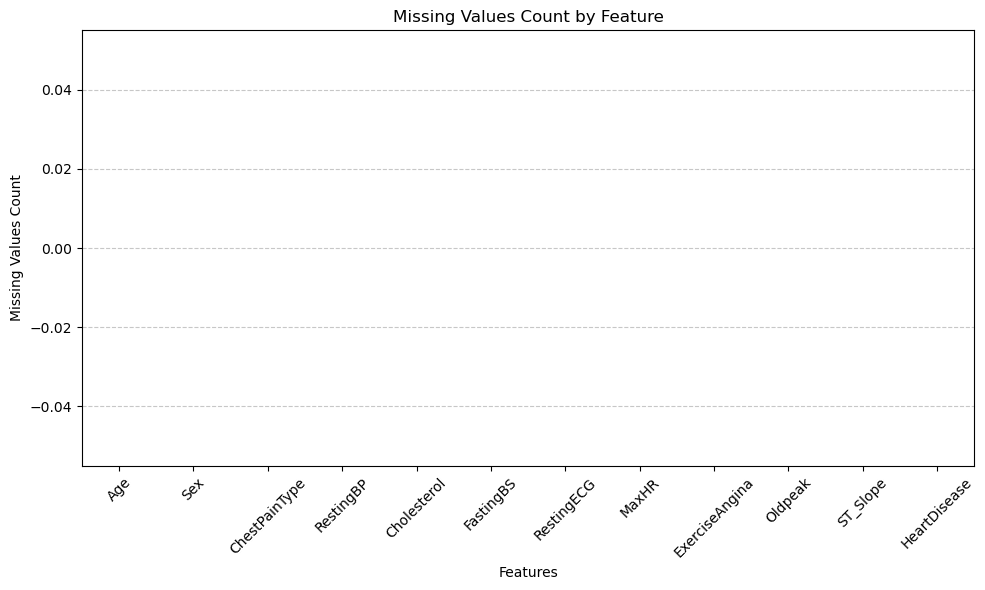

In [10]:
# Get the missing values count
missing_values_count = heart.isnull().sum()
 
# Plotting the bar chart
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Count by Feature')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

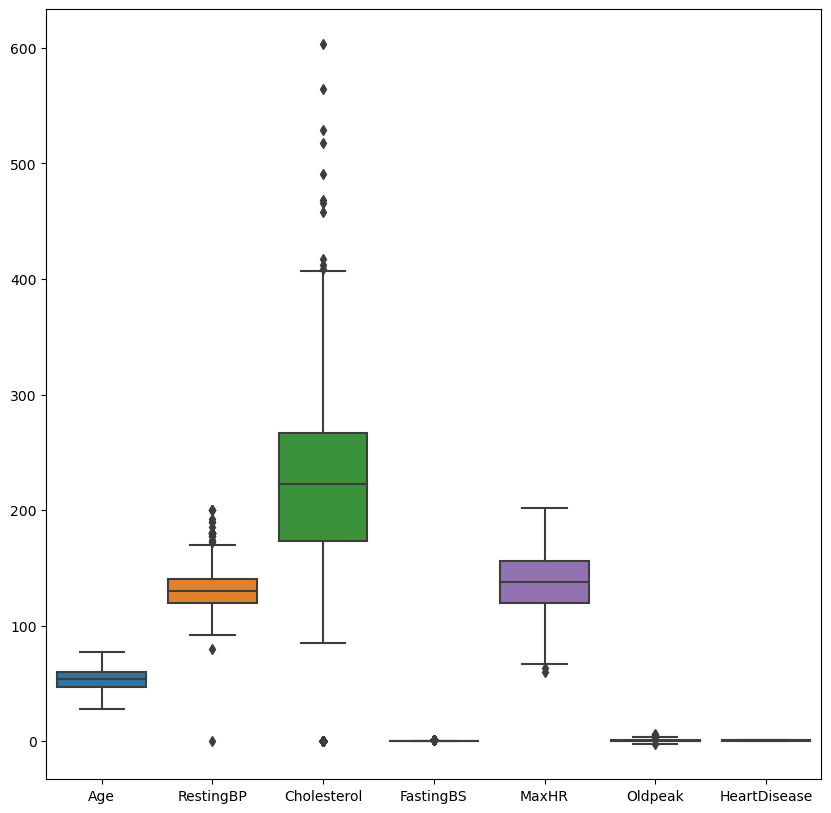

In [11]:
# Checking for outliers
sns.boxplot(data=heart[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR',
       'Oldpeak', 'ST_Slope','ExerciseAngina', 'HeartDisease']])
fig=plt.gcf()
fig.set_size_inches(10,10)

The box plot shows that there are ouliers, however i won't be dealing with the ouliers as they are not so significant

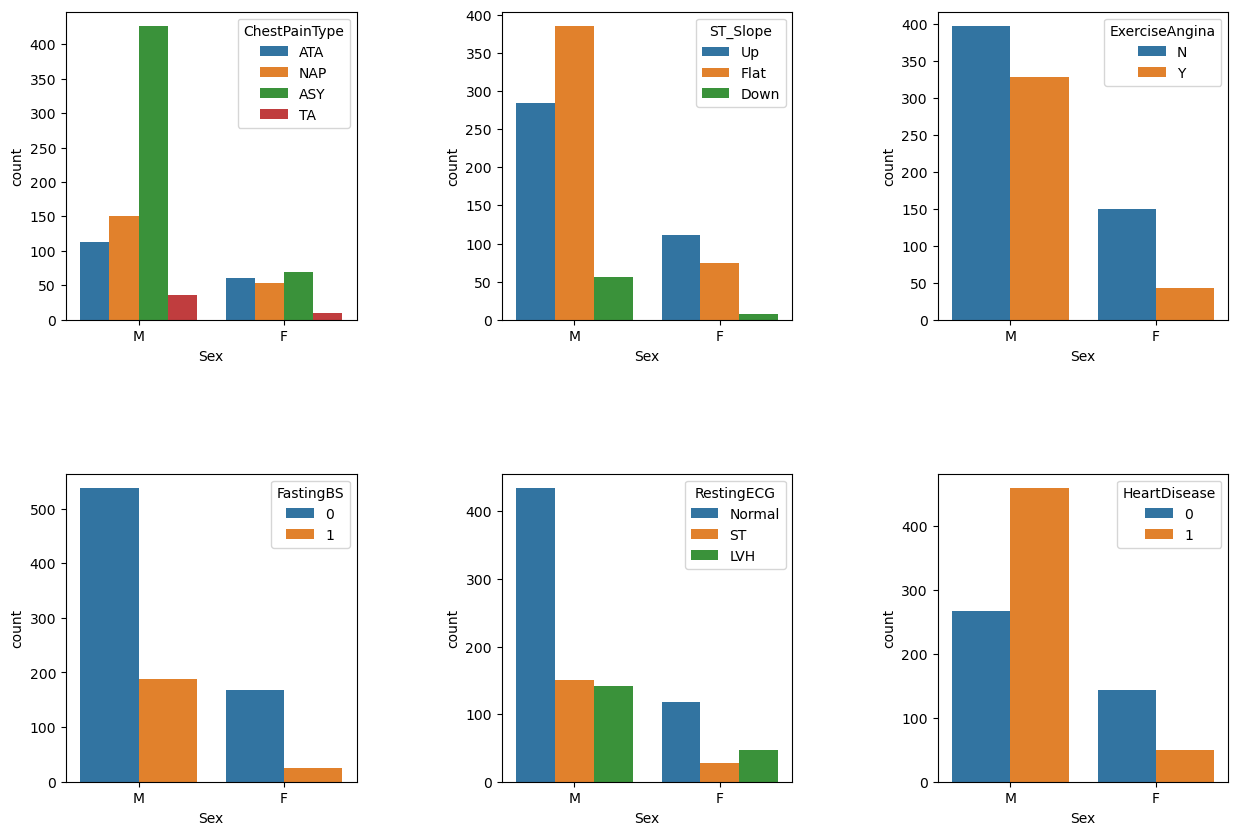

In [12]:
#Plotting count plot of all the categorical variables

fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the figsize as needed

sns.countplot(x="Sex", hue="ChestPainType", data=heart, ax=ax[0, 0])
sns.countplot(x="Sex", hue="ST_Slope", data=heart, ax=ax[0, 1])
sns.countplot(x="Sex", hue="ExerciseAngina", data=heart, ax=ax[0, 2])
sns.countplot(x="Sex", hue="FastingBS", data=heart, ax=ax[1, 0])
sns.countplot(x="Sex", hue="RestingECG", data=heart, ax=ax[1, 1])
sns.countplot(x="Sex", hue="HeartDisease", data=heart, ax=ax[1, 2])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # You can adjust the spacing values as needed

plt.show()


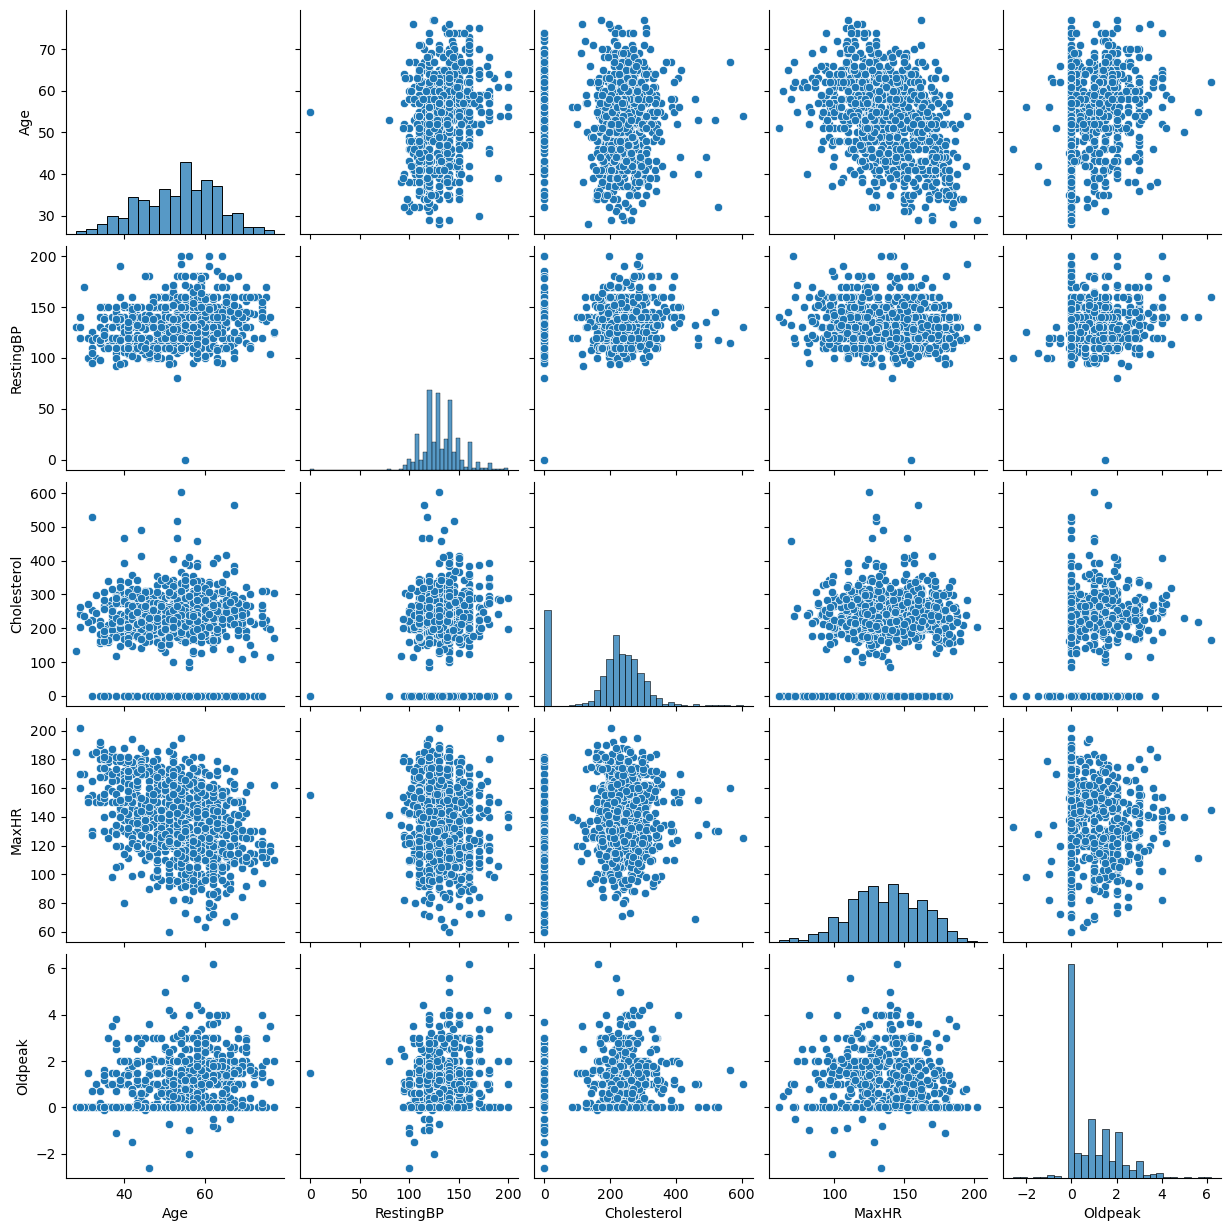

In [13]:
#Plotting pairplot of all the numeric variables

sns.pairplot(heart[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]])
plt.show()

## 4. Exploratory_data_visualization

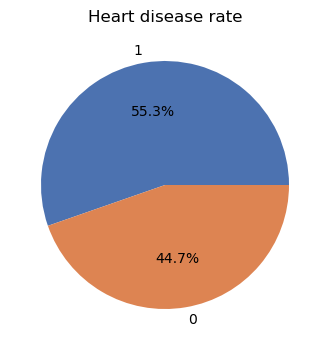

In [14]:
# What is the percentage of people with heart disease or none

plt.figure(figsize=(4,6))
heart_rate= heart['HeartDisease'].value_counts()
plt.pie(heart_rate.values, labels=heart_rate.index, autopct= '%1.1f%%', colors=sns.color_palette('deep'))
plt.title('Heart disease rate')
plt.show()

The pie chart shows that 55% of the patients used in the dataset has heart disease with 44% of the patient in good condition.

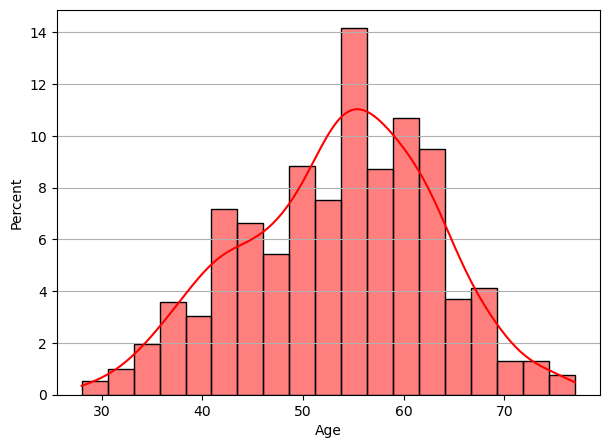

In [15]:
import plotly.graph_objects as go  # Import Plotly graph objects module

# Create a histogram of the age distribution
plt.figure(figsize=(7, 5))
sns.histplot(heart['Age'], kde=True, color='red', stat='percent')
plt.grid(axis='y')
plt.show()

The histogram distribution shows that the majority of people visiting the hospital to check for heart disease condition are between the ages of 40 and 70, withthe highest at 55 years old.

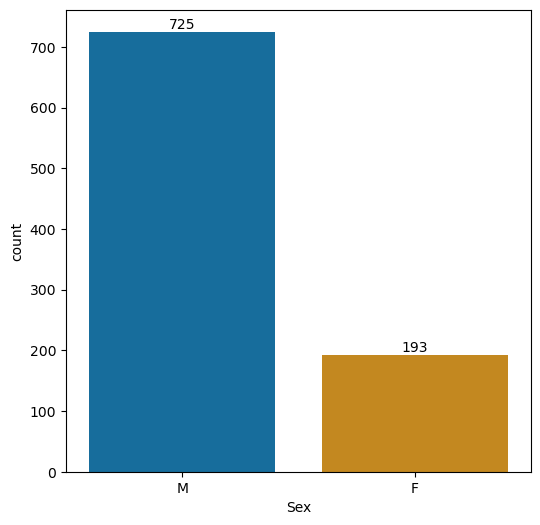

In [16]:
# Create a barchart for the sex 

plt.figure(figsize=(6,6))
ax = sns.countplot(heart, x='Sex',  palette='colorblind')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha = 'center', va = 'center',
                xytext=(0, 5),
                textcoords = 'offset points')
    
plt.show()

From this chart, it is observed that the majority of observation are the male with 725 observation and the female with 193. which literally shows that there is bias in the data.

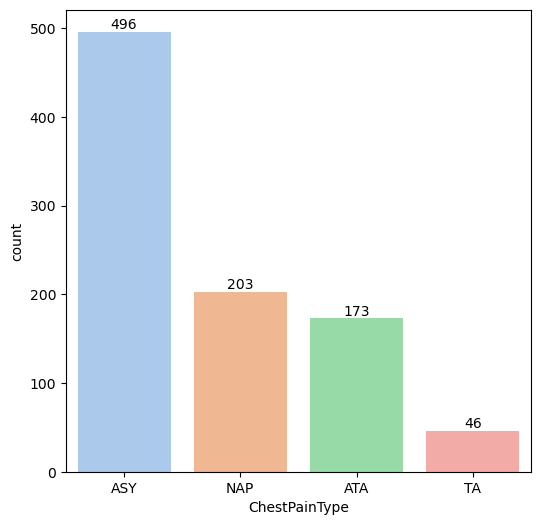

In [17]:
# Creating a count plot for the Chest pain 

value_counts = heart['ChestPainType'].value_counts()
desired_order = value_counts.sort_values(ascending=False)

plt.figure(figsize=(6,6))
ax = sns.countplot(heart, x='ChestPainType', palette='pastel', order=desired_order.index)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha = 'center', va = 'center',
                xytext=(0, 5),
                textcoords = 'offset points')
    
plt.show()

Explanation of the 4 types of chestpain

1. TA: Typical Angina - This kind of chest pain is characterised as a pressure or discomfort in the chest that usually happens during stress or physical activitya and this can be caused by Reduced blood flow to the heart.
2. ATA: Atypical Angina: The presentation of this chest pain is different from typical angina. Although it might not follow the traditional pattern associated with normal angina, it might nonetheless cause chest pressure or discomfort.
3. Non-Anginal Pain (NAP): is a chest pain not related to decreased blood flow to the heart. Other possible causes include gastrointestinal disorders, anxiety, and musculoskeletal problems.
4. Asymptomatic (ASY): This suggests that there is no discomfort or pain in the chest. It indicates that the person does not have any symptoms associated with chest pain.

This dataset shows that the highest number of (496) people has ASY which means they do not have chest pain symptoms, followed by NAP (203), ATA (173), then TA (46).

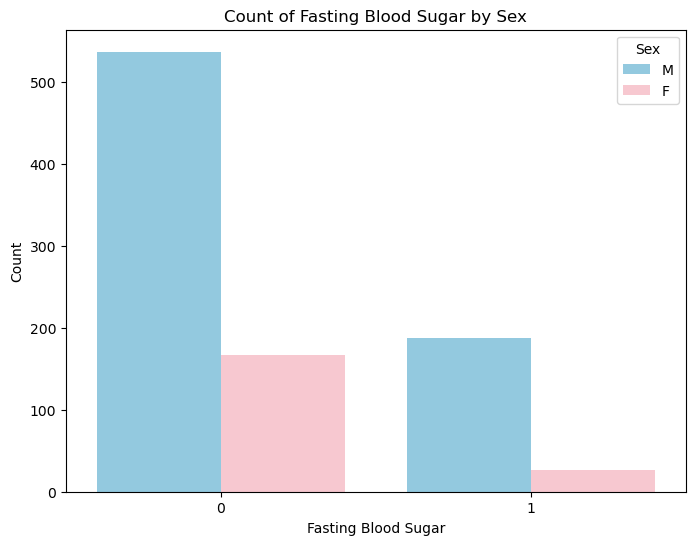

In [18]:
# Plotting a count plot of Fasting Blood Sugar against Sex

plt.figure(figsize=(8, 6))


sns.countplot(x='FastingBS', hue='Sex', data=heart, palette={'M': 'skyblue', 'F': 'pink'})

# Set plot labels and title
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Count of Fasting Blood Sugar by Sex')

# Display the count plot
plt.show()

The plot shows that there are greater number of people with low blood sugar. the chart also shows more male with high FBS than female. this can also be seen as a bias because beacuse the dataset has more male than the female and the general opinion of people that the men then to have heart failure than the women.

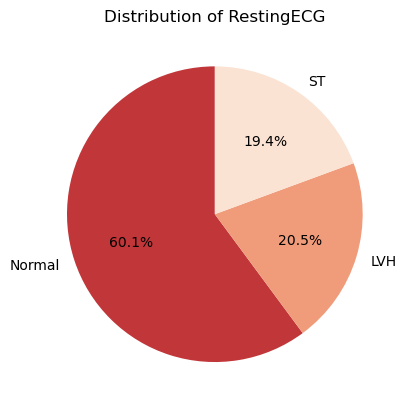

In [19]:
# Creating a pie chart for Distribution of RestingECG

RestingECG_counts = heart['RestingECG'].value_counts()

# Pie chart
plt.pie(RestingECG_counts, labels=RestingECG_counts.index, autopct='%1.1f%%', colors=sns.color_palette('RdBu'), startangle=90)

# Set chart title
plt.title('Distribution of RestingECG')

# Display the pie chart
plt.show()

Resting electrocardiogram readings are referred to as restingECG. The terms "Normal" indicates a normal result, "ST" denote the presence of abnormalities, and "LVH" shows leftventricular hypertropy. The pie chart shows that 60.1% has normal result, 20.5% has LVH and 19.4% shows ST abnormalities.

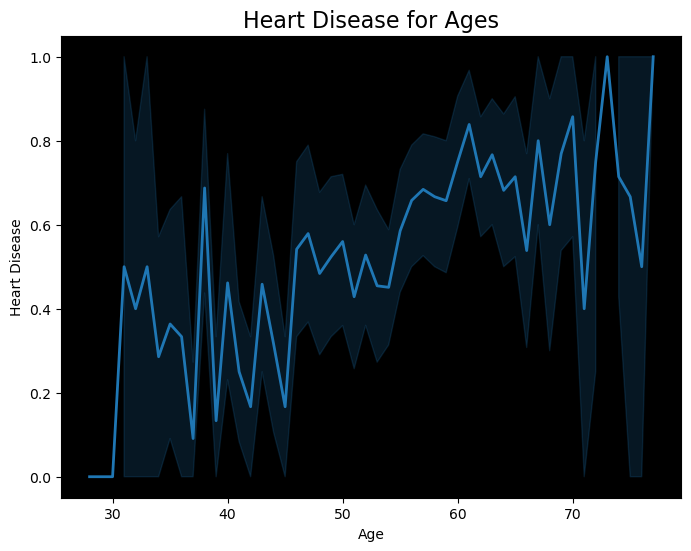

In [20]:
# creating a line plot for distribution of Heart Disease for Ages

plt.figure(figsize=(8, 6))
sns.lineplot(x=heart['Age'], y=heart['HeartDisease'], data=heart, linewidth=2)


plt.title('Heart Disease for Ages', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Heart Disease')

plt.gca().set_facecolor('black')

# Show the plot
plt.show()

This line plot shows that that people around the age of 60 and 70 suffer from heart disease condition.

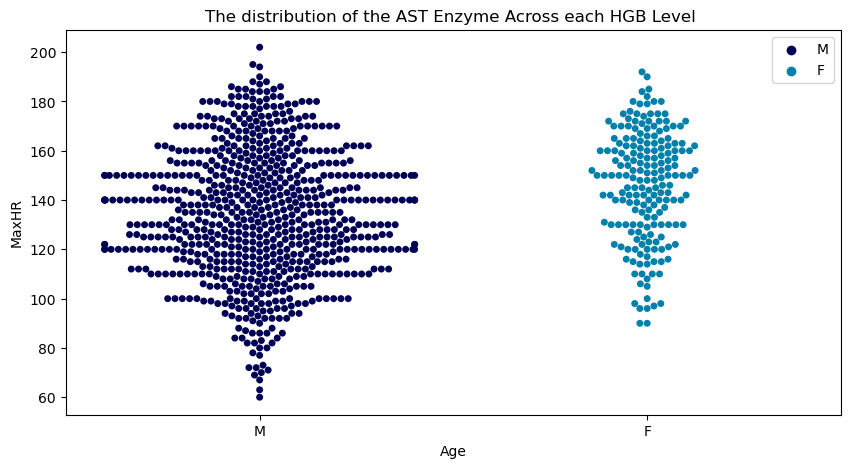

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(10,5))
sns.swarmplot(y=heart['MaxHR'],x=heart['Sex'],hue=heart['Sex'],palette="ocean")
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.title("The distribution of the AST Enzyme Across each HGB Level ")
plt.show()
plt.savefig('asthgb.png')

Here, there are more male with AST enzyme than the female, this can also be deduce that there are more male population than the female.

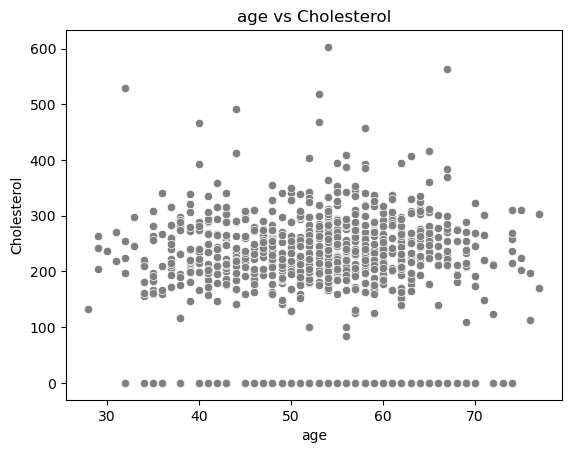

In [22]:
# creting a scatter plot age vs Cholesterol

sns.scatterplot(x='Age', y='Cholesterol', data=heart, color='grey')

# Set plot labels and title
plt.xlabel('age')
plt.ylabel('Cholesterol')
plt.title('age vs Cholesterol')

# Display the plot
plt.show()

## Prepping for the data modelling

In [23]:
#Converting categorical data to numeric

heart["Sex"].replace({'M': 1, 'F': 0}, inplace=True)
heart["ChestPainType"].replace({'ASY': 1, 'ATA': 2,'NAP':3,'TA':4}, inplace=True)
heart["RestingECG"].replace({'LVH': 1, 'Normal': 2,'ST':3}, inplace=True)
heart["ExerciseAngina"].replace({'Y': 1, 'N': 0}, inplace=True)
heart["ST_Slope"].replace({'Down': 1, 'Up': 2,'Flat':3}, inplace=True)


heart.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              2        140          289          0           2   
1   49    0              3        160          180          0           2   
2   37    1              2        130          283          0           3   
3   48    0              1        138          214          0           2   
4   54    1              3        150          195          0           2   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         3             1  
2     98               0      0.0         2             0  
3    108               1      1.5         3             1  
4    122               0      0.0         2             0

## Correlation Matrix

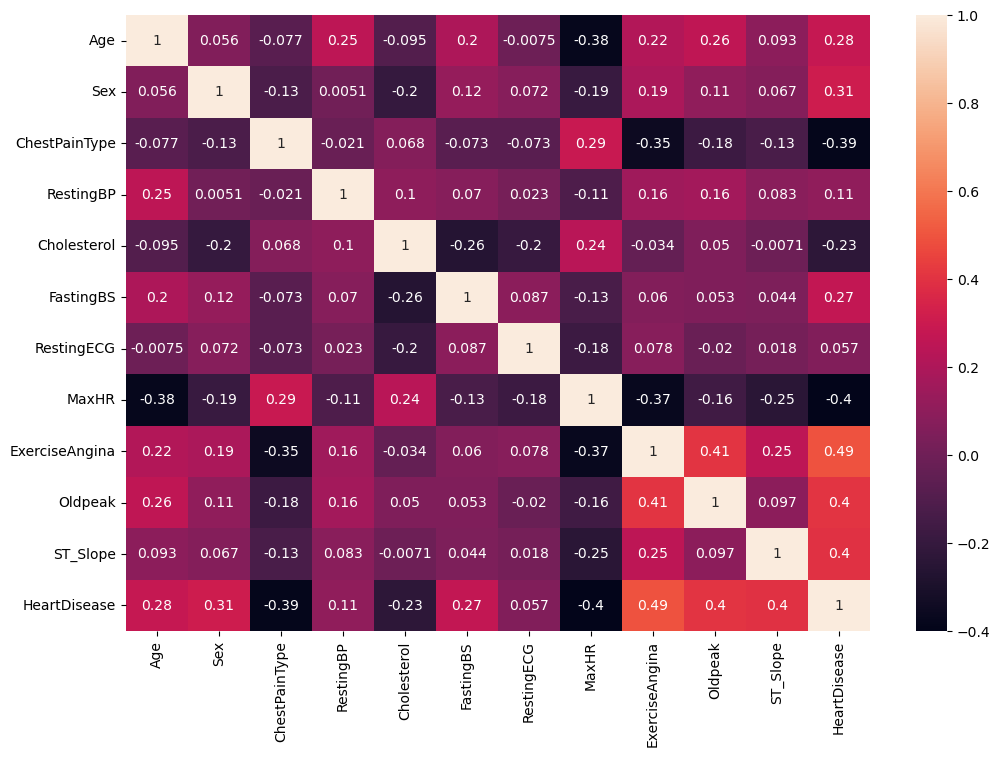

In [24]:
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

# Create the heatmap
sns.heatmap(heart.corr(), annot=True)

# Display the plot
plt.show()

## 5. Machine_Learning_Model

### Define X and Y

In [25]:
X=heart.drop(columns=['HeartDisease'],axis=1)
Y=heart["HeartDisease"]
X.head()


Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              2        140          289          0           2   
1   49    0              3        160          180          0           2   
2   37    1              2        130          283          0           3   
3   48    0              1        138          214          0           2   
4   54    1              3        150          195          0           2   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0    172               0      0.0         2  
1    156               0      1.0         3  
2     98               0      0.0         2  
3    108               1      1.5         3  
4    122               0      0.0         2

Here i am preparing my data for the model by separating features from target variables, storing them in variables X and my target colum as Y variable

### Splitting the data

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)
print(X.shape,X_train.shape,X_test.shape)


(918, 11) (734, 11) (184, 11)


In [27]:
# Standardize the features (optional but recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Create the SVM classification model

In [28]:
model = svm.SVC(kernel='linear')

model.fit(X_train,Y_train)


SVC(kernel='linear')

### Evaluate using the training data


In [29]:
train_predict=model.predict(X_train)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_predict))
print("Precision on training data:", metrics.precision_score(Y_train, train_predict))
print("Recall on training data:", metrics.recall_score(Y_train, train_predict))


Accuracy on training data:  0.8664850136239782
Precision on training data: 0.8774509803921569
Recall on training data: 0.8817733990147784


### Evaluate using the testing data


In [30]:
test_predict=model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_predict))
print("Precision on testing data:", metrics.precision_score(Y_test, test_predict))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_predict))


Accuracy on testing data:  0.8315217391304348
Precision on testing data: 0.8446601941747572
Recall on testing data:  0.8529411764705882


### Evaluate using the testing data


In [31]:
Y_predict=model.predict(X_test)


### Display the confusion matrix for your model


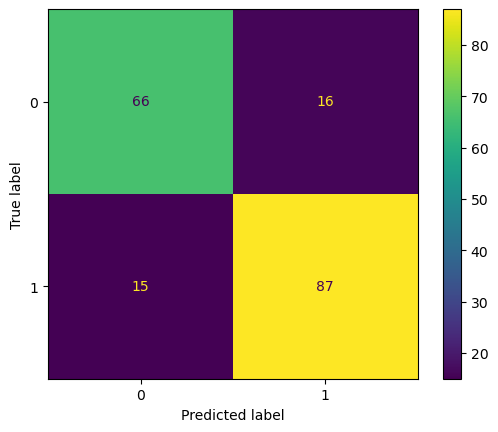

In [32]:
cm = metrics.confusion_matrix(Y_test, Y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


### Calculate the accuracy, precision and recall


In [33]:
# Extract values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
calculated_specificity = (TN)/(TN+FP)


print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)
print("Calculated specificity = ", calculated_specificity)



Calculated accuracy =  0.8315217391304348
Calculated precision =  0.8446601941747572
Calculated recall =  0.8529411764705882
Calculated specificity =  0.8048780487804879


In [34]:
print(metrics.classification_report(Y_test, test_predict))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        82
           1       0.84      0.85      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



#### The model achieved high accuracy, precision, recall, and specificity, with 83.15% of predictions being correct. It correctly identified 85.29% of positive cases and 80.49% of negative cases. The model performed reasonably well in making predictions, indicating high accuracy, precision, recall, and specificity.

### Plotting the Receiver operating characteristic (ROC)

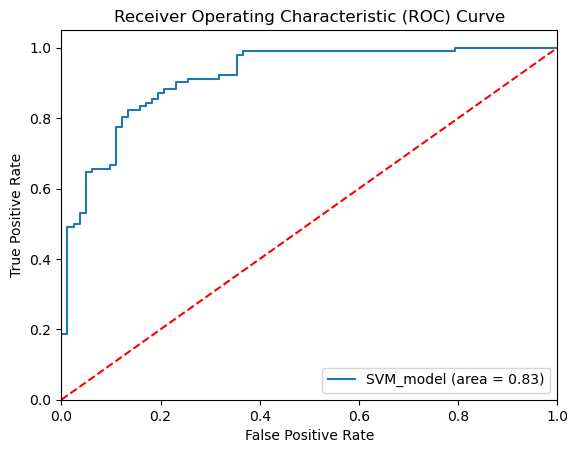

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC curve
SVM_model_roc_auc = roc_auc_score(Y_test, model.predict(X_test))
SVM_model_fpr, SVM_model_tpr, SVM_model_thresholds = roc_curve(Y_test, model.decision_function(X_test))

# Plot ROC curve
plt.figure()
plt.plot(SVM_model_fpr, SVM_model_tpr, label='SVM_model (area = %0.2f)' % SVM_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### The ROC curve visually evaluates a model's discriminative ability, showing true positive rate and false positive rate as classification thresholds change, with a closer curve indicating better performance.

### Feature Selection

In [36]:
coefficients = model.coef_[0]  # Assuming binary classification
feature_importance = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient'])
feature_importance = feature_importance.abs().sort_values(by='Coefficient', ascending=False)
print(feature_importance)

                Coefficient
ExerciseAngina     1.159771
ST_Slope           0.973709
Sex                0.823881
FastingBS          0.745594
Oldpeak            0.505063
ChestPainType      0.375162
RestingECG         0.148051
Age                0.013705
MaxHR              0.007000
RestingBP          0.005053
Cholesterol        0.003291


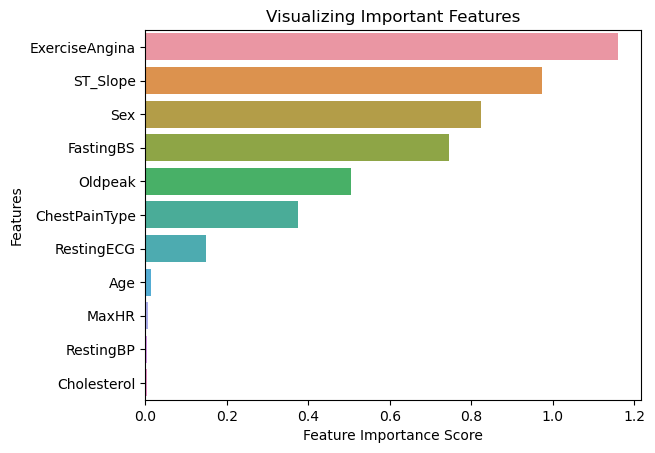

In [37]:
coefficients = model.coef_[0]  # Assuming binary classification
feature_importance = pd.Series(coefficients, index=X_train.columns).abs().sort_values(ascending=False)


# Creating a seaborn bar plot
sns.barplot(x=feature_importance, y=feature_importance.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

#### The SVM algorithm is utilized for feature selection in a scikit-learn library model, revealing that RestingBp, Cholesterol, and MaxHR do not perform better in the model.

### KNN MODEL

Accuracy on training data: 0.782016348773842
Precision on training data: 0.7971014492753623
Recall on training data: 0.812807881773399
Accuracy on testing data: 0.7065217391304348
Precision on testing data: 0.7181818181818181
Recall on testing data: 0.7745098039215687


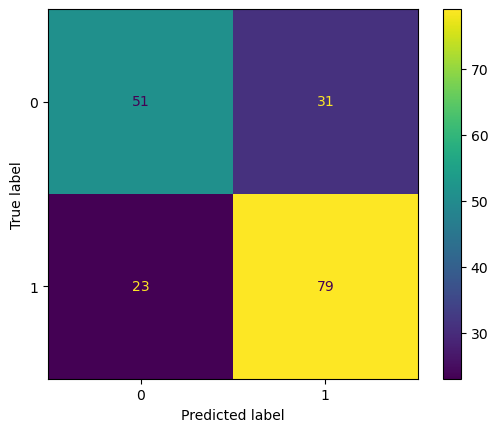

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Create KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Train the model
knn_model.fit(X_train, Y_train)

# Predictions on training data
train_predict_knn = knn_model.predict(X_train)

# Evaluate training performance
print("Accuracy on training data:", metrics.accuracy_score(Y_train, train_predict_knn))
print("Precision on training data:", metrics.precision_score(Y_train, train_predict_knn))
print("Recall on training data:", metrics.recall_score(Y_train, train_predict_knn))

# Predictions on testing data
test_predict_knn = knn_model.predict(X_test)

# Evaluate testing performance
print("Accuracy on testing data:", metrics.accuracy_score(Y_test, test_predict_knn))
print("Precision on testing data:", metrics.precision_score(Y_test, test_predict_knn))
print("Recall on testing data:", metrics.recall_score(Y_test, test_predict_knn))

# Confusion matrix
cm_knn = metrics.confusion_matrix(Y_test, test_predict_knn)
disp_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()

In [39]:
print(metrics.classification_report(Y_test, test_predict_knn))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        82
           1       0.72      0.77      0.75       102

    accuracy                           0.71       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.71      0.71      0.70       184



#### The model achieved 70.65% accuracy, 71.82% precision, and 77.45% recall on testing data, indicating it correctly classified 70.65% instances, 71.82% of true positive predictions, and 77.45% of actual positive cases, indicating decent performance but room for improvement.

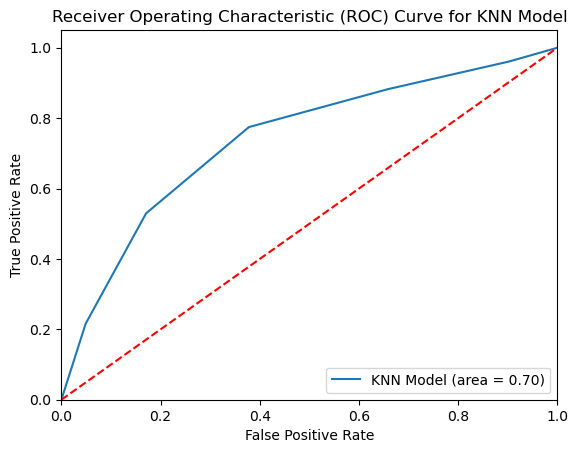

In [40]:
# Calculate ROC curve for KNN model
knn_model_roc_auc = roc_auc_score(Y_test, knn_model.predict(X_test))
knn_model_fpr, knn_model_tpr, knn_model_thresholds = roc_curve(Y_test, knn_model.predict_proba(X_test)[:,1])

# Plot ROC curve for KNN model
plt.figure()
plt.plot(knn_model_fpr, knn_model_tpr, label='KNN Model (area = %0.2f)' % knn_model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN Model')
plt.legend(loc="lower right")
plt.show()

## 6. HYPEPARAMETER_TUNNING

In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Define the parameter grid for KNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Create SVM model
svm_model = SVC()

# Create KNN model
knn_model = KNeighborsClassifier()

# Grid search cross-validation for SVM
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=8, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, Y_train)

# Best parameters and best score for SVM
print("Best SVM parameters:", svm_grid_search.best_params_)
print("Best SVM score:", svm_grid_search.best_score_)

# Grid search cross-validation for KNN
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=8, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, Y_train)

# Best parameters and best score for KNN
print("Best KNN parameters:", knn_grid_search.best_params_)
print("Best KNN score:", knn_grid_search.best_score_)

# Store results in a dictionary
results = {
    'Model': ['SVM', 'KNN'],
    'Best Parameters': [svm_grid_search.best_params_, knn_grid_search.best_params_],
    'Best Score': [svm_grid_search.best_score_, knn_grid_search.best_score_]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Display results
print("Grid Search Results:")
print(results_df)

Best SVM parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best SVM score: 0.8610099139990444
Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN score: 0.750716674629718
Grid Search Results:
  Model                                    Best Parameters  Best Score
0   SVM           {'C': 1, 'gamma': 1, 'kernel': 'linear'}    0.861010
1   KNN  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...    0.750717


#### The model accuracy improved after optimizing the SVM model improved in it's accuracy from a 83% to 86% and the KNN model improved from 70% to 75%.

## 7. Investigating_Bias_on_the_Gender_Group

### Splitting the True and Predicted Values into Male and Female Groups

In [42]:
# Get the indices for “Male” and “Female” from the test data 

PROTECTED  =  "Sex" 
MEN =  1.0 #male 
WOMEN = 0.0 #women
Sex_dist = X_test[PROTECTED].value_counts()
print(Sex_dist)
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)


1    146
0     38
Name: Sex, dtype: int64
[  1   2   4   5   6   7   8  10  11  12  13  14  15  16  18  20  21  22
  23  24  25  26  27  28  32  33  34  35  36  37  38  40  41  43  44  45
  46  47  48  49  50  52  53  54  55  56  57  58  59  60  63  64  65  66
  67  68  69  71  72  73  74  77  78  79  80  81  82  84  85  86  87  88
  89  90  91  93  94  95  96  97  98 101 102 103 104 105 106 107 108 110
 111 112 113 115 116 117 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 144 145 146 147 148 149 151 153 154
 155 157 159 161 162 164 165 166 167 168 170 171 174 175 176 178 179 180
 181 183] No of Men = 146
[  0   3   9  17  19  29  30  31  39  42  51  61  62  70  75  76  83  92
  99 100 109 114 118 119 141 142 143 150 152 156 158 160 163 169 172 173
 177 182] No of Women = 38


### Extract the actual and predicted outcomes for the two groups

In [43]:
# Extract the actual and predicted outcomes for the two groups
Y_test_m = [Y_test.values[i] for i in men_indices]
Y_test_f = [Y_test.values[i] for i in women_indices]
print(Y_test_m)
print(Y_test_f)


[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
[0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]


### Testing the 2 gender group

In [44]:
# Testing the 2 gender group
test_predict_m = [test_predict[i] for i in men_indices]
test_predict_f = [test_predict[i] for i in women_indices]
print(test_predict_m)
print(test_predict_f)

[1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Confusion matrix on Males

TN=38, FP=14, FN=9, TP=85


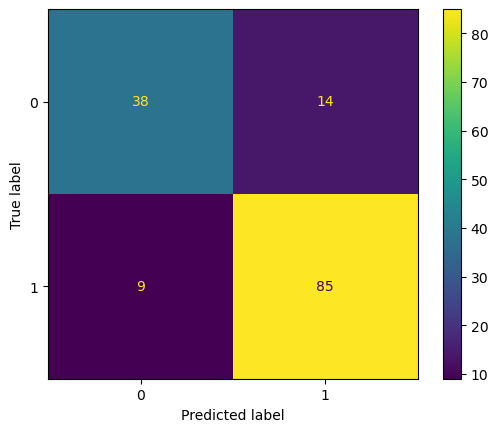

In [45]:
cm_m = metrics.confusion_matrix(Y_test_m, test_predict_m)
TN_m, FP_m, FN_m, TP_m = cm_m.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_m, FP_m, FN_m, TP_m))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m)
disp.plot()
plt.show()

In [46]:
calculated_accuracy_m = (TP_m + TN_m) / (TP_m + TN_m + FP_m + FN_m)
calculated_precision_m = (TP_m) / (TP_m + FP_m)
calculated_recall_m = (TP_m) / (TP_m + FN_m)
calculated_specificity_m = (TN_m) / (TN_m + FP_m)
calculated_positive_rate_m = (TP_m + FP_m) / (TP_m + FP_m + TN_m + FN_m)
print("Calculated accuracy = ", calculated_accuracy_m)
print("Calculated precision = ", calculated_precision_m)
print("Calculated recall = ", calculated_recall_m)
print("Calculated specificity = ", calculated_specificity_m)
print("Calculated positive rate = ", calculated_positive_rate_m)

Calculated accuracy =  0.8424657534246576
Calculated precision =  0.8585858585858586
Calculated recall =  0.9042553191489362
Calculated specificity =  0.7307692307692307
Calculated positive rate =  0.678082191780822


#### The model's performance in predicting outcomes is good, but a positive rate of 0.678 suggests potential bias, potentially leading to disproportionate outcomes for different groups, requiring further analysis and mitigation strategies.

### Confusion matrix on Females

TN=28, FP=2, FN=6, TP=2


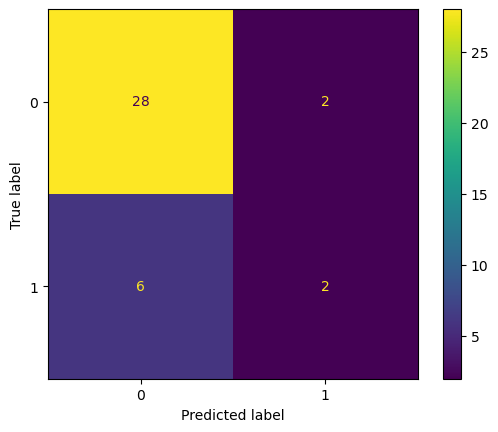

In [47]:
cm_f = metrics.confusion_matrix(Y_test_f, test_predict_f)
TN_f, FP_f, FN_f, TP_f = cm_f.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_f, FP_f, FN_f, TP_f))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp.plot()
plt.show()

In [48]:
calculated_accuracy_f = (TP_f+TN_f)/(TP_f+TN_f+FP_f+FN_f)
calculated_precision_f = (TP_f)/(TP_f+FP_f)
calculated_recall_f = (TP_f)/(TP_f+FN_f)
calculated_specificity_f = (TN_f)/(TN_f+FP_f)
calculated_positive_rate_f = (TP_f + FP_f) / (TP_f + FP_f + TN_f + FN_f)
print("Calculated accuracy = ", calculated_accuracy_f)
print("Calculated precision = ", calculated_precision_f)
print("Calculated recall = ", calculated_recall_f)
print("Calculated specificity = ", calculated_specificity_f)
print("Calculated positive rate = ", calculated_positive_rate_f)

Calculated accuracy =  0.7894736842105263
Calculated precision =  0.5
Calculated recall =  0.25
Calculated specificity =  0.9333333333333333
Calculated positive rate =  0.10526315789473684


#### The model's specificity is high, but its precision is low, indicating a high false positive rate. The low recall suggests the model's effectiveness in capturing all positive instances, suggesting potential bias.

## 8. Transparency_Explainable_AI

In [49]:
 from joblib import dump, load
model = svm.SVC(kernel='linear',probability=True)
model.fit(X_train,Y_train)

SVC(kernel='linear', probability=True)

In [50]:
# Dumping the model into a joblib file
dump(model, 'SVM_heart.joblib')

['SVM_heart.joblib']

In [51]:
# Loading the model
model_from_file = load('SVM_heart.joblib')

In [52]:
pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ------------------------- ------------ 184.3/275.7 kB 5.6 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=8873ee74e6f36c5a69f8b43a602b745ffad89cf97e64a6ed623893056ba9e2b8
  Stored in directory: c:\users\q2241217\appdata\local\pip\cache\wheels\fd\a2\af\9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
#Importing the Lime package
import lime.lime_tabular


In [54]:
#Creating an explainer using Lime TabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
feature_names=X_train.columns,
verbose=True, mode='classification')

In [55]:
#Craete an explainer for the prediction

explanation = explainer.explain_instance(X_test.iloc[0], model.predict_proba)


Intercept 1.1315649234875682
Prediction_local [-0.0229416]
Right: 0.029068608721357612


In [56]:
#Showing the result
explanation.show_in_notebook(show_table=True)

explanation.as_list()

[('ST_Slope <= 2.00', -0.29477247825531155),
 ('ExerciseAngina <= 0.00', -0.2600836107857425),
 ('Oldpeak <= 0.00', -0.2002278495523885),
 ('1.00 < ChestPainType <= 3.00', -0.17064042756478986),
 ('FastingBS <= 0.00', -0.1630468794368949),
 ('Cholesterol > 264.00', -0.10390703192566043),
 ('MaxHR > 156.00', -0.06456605221352196),
 ('RestingECG <= 2.00', 0.04810648782551729),
 ('RestingBP <= 120.00', 0.037751384672081875),
 ('54.00 < Age <= 60.00', 0.01687992984364072)]

This study reveals that features like ST_Slope, ExerciseAngina, and Oldpeak have a significant negative impact on heart disease risk, while RestingECG and RestingBP have a positive impact.